# 2.1Collecting data by playing a public goods game

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='openpyxl')
LetsPlot.setup_html(no_js=True)

In [3]:
plt.style.use(

    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

# Question 1

In [4]:
data = {
    "Copenhagen": [14.5, 12.1, 12.5, 13.1, 11.3, 12.7, 11.8, 10.1, 9.4, 4.3],
    "Dniprop": [11.0, 11.6, 12.1, 12.2, 10.3, 9.5, 6.5, 8.3, 7.1, 6.7],
    "Minsk": [11.7, 13.3, 11.8, 11.4, 12.2, 9.6, 9.9, 7.4, 7.3, 6.2],
}
df = pd.DataFrame.from_dict(data)
df.head()


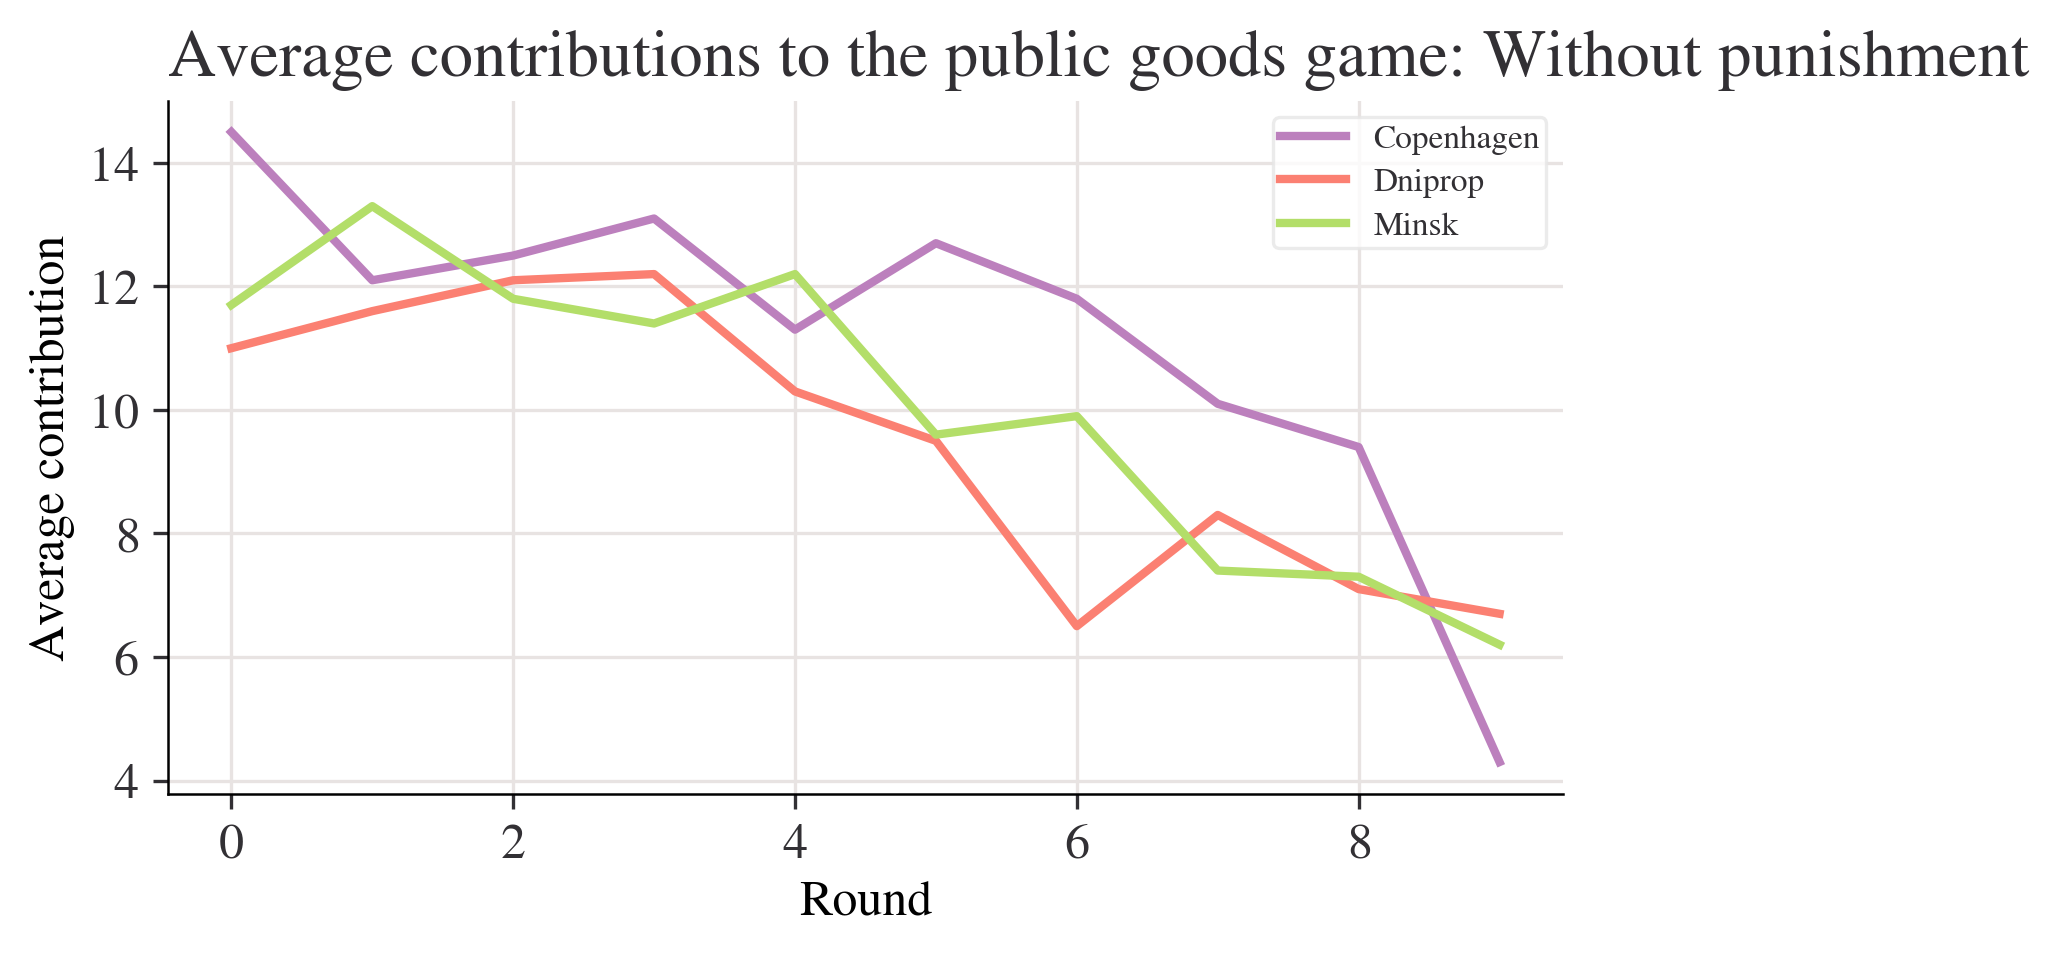

In [5]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Average contributions to the public goods game: Without punishment")
ax.set_ylabel("Average contribution")
ax.set_xlabel("Round");

# Question 2

Similarities: both depict changes in social contributions, demonstrate
gradual change trends, and reflect changes in participants’ strategic
adjustments over the course of the game \# Question 3 Reason for
similarity: human behaviour may show some stability and consistency in
certain contexts. Reasons for differences: differences in the rules of
the game, different characteristics of the group of participants,
differences in the experimental environment, etc.

# Part 2.2 Describing the data

# Question 1（a）

In [6]:
data_np = pd.read_excel(
    "data/doing-economics-datafile-working-in-excel-project-2.xlsx",
    usecols="A:Q",
    header=1,
    index_col="Period",
)
data_n = data_np.iloc[:10, :].copy()
data_p = data_np.iloc[14:24, :].copy()

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)

In [7]:
test_data = {
    "City A": [14.1, 14.1, 13.7],
    "City B": [11.0, 12.6, 12.1],
}


# Original dataframe
test_df = pd.DataFrame.from_dict(test_data)
# A copy of the dataframe
test_copy = test_df.copy()
# A pointer to the dataframe
test_pointer = test_df


test_pointer.iloc[1, 1] = 99

In [8]:
print("test_df=")
print(f"{test_df}\n")
print("test_copy=")
print(f"{test_copy}\n")

test_df=
   City A  City B
0    14.1    11.0
1    14.1    99.0
2    13.7    12.1

test_copy=
   City A  City B
0    14.1    11.0
1    14.1    12.6
2    13.7    12.1


In [9]:

data_n.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Copenhagen       10 non-null     object
 1   Dnipropetrovs’k  10 non-null     object
 2   Minsk            10 non-null     object
 3   St. Gallen       10 non-null     object
 4   Muscat           10 non-null     object
 5   Samara           10 non-null     object
 6   Zurich           10 non-null     object
 7   Boston           10 non-null     object
 8   Bonn             10 non-null     object
 9   Chengdu          10 non-null     object
 10  Seoul            10 non-null     object
 11  Riyadh           10 non-null     object
 12  Nottingham       10 non-null     object
 13  Athens           10 non-null     object
 14  Istanbul         10 non-null     object
 15  Melbourne        10 non-null     object
dtypes: object(16)
memory usage: 1.3+ KB

In [10]:
data_n = data_n.astype("double")
data_p = data_p.astype("double")

In [11]:
mean_n_c = data_n.mean(axis=1)
mean_p_c = data_p.agg(np.mean, axis=1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12316\3801786469.py:2: FutureWarning: The provided callable <function mean at 0x000001305E09E980> is currently using DataFrame.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_p_c = data_p.agg(np.mean, axis=1)

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Question 1（b）

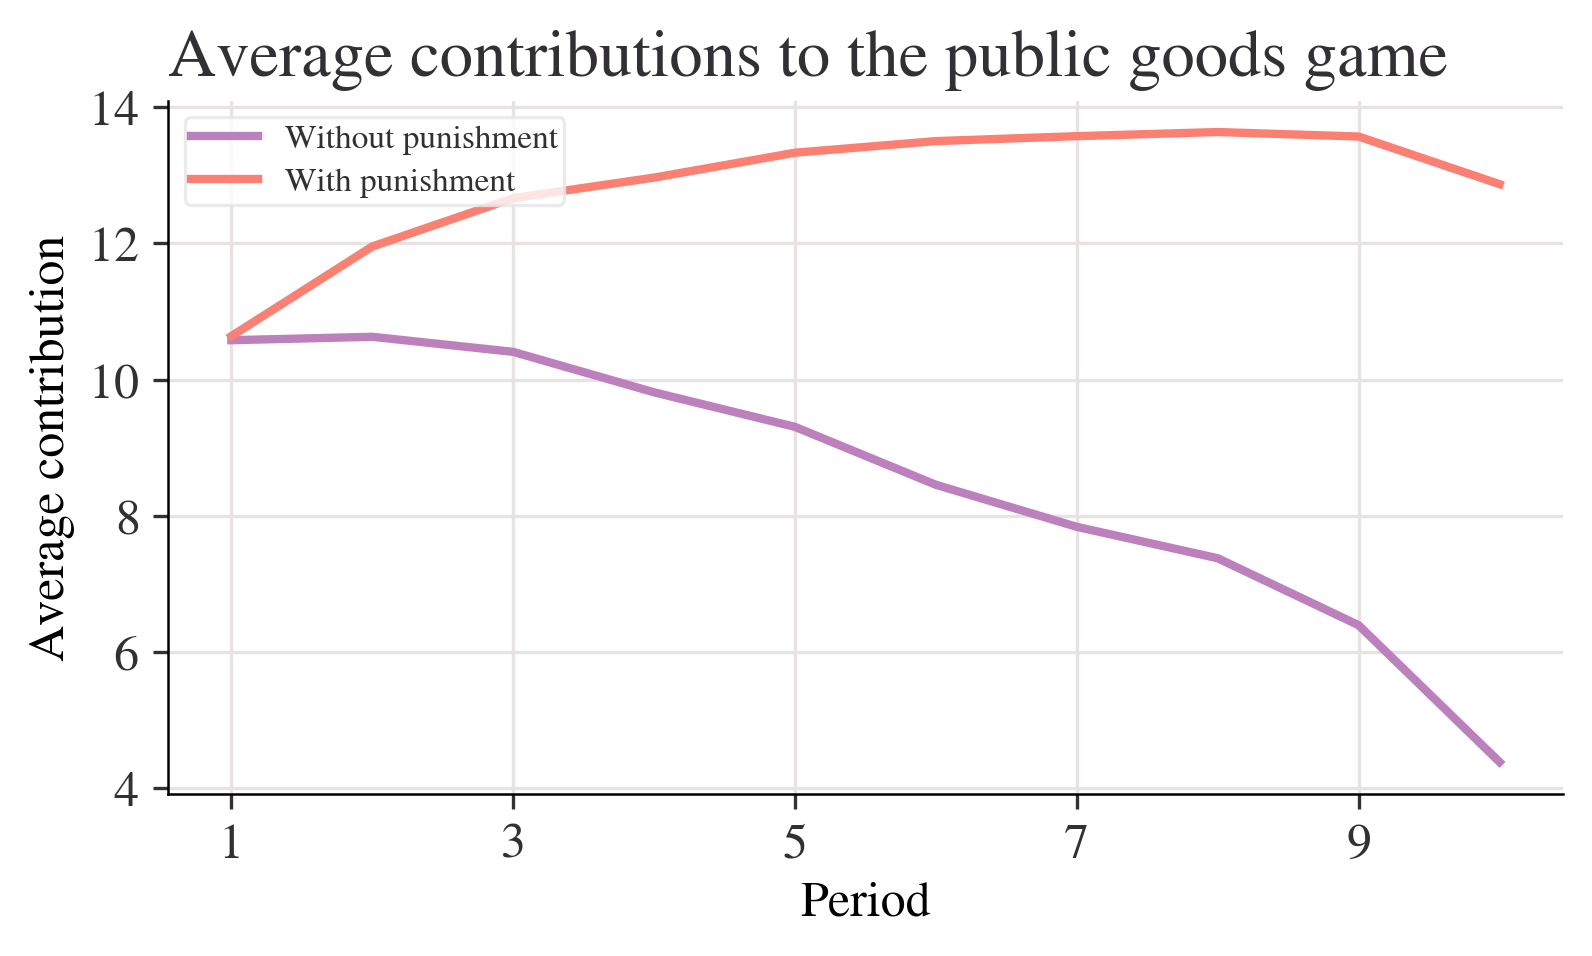

In [13]:
fig, ax = plt.subplots()
mean_n_c.plot(ax=ax, label="Without punishment")
mean_p_c.plot(ax=ax, label="With punishment")
ax.set_title("Average contributions to the public goods game")
ax.set_ylabel("Average contribution")
ax.legend();

# Question 1（c）

Difference: in the absence of penalties, the average contribution
quickly reaches a relatively high peak early on, and with penalties, the
average contribution is relatively low early on. Similar: the average
contribution levels of the two experiments differed early on, but they
both showed a trend over time

# Question 2

In [14]:
partial_names_list = ["F. Kennedy", "Lennon", "Maynard Keynes", "Wayne"]
["John " + name for name in partial_names_list]

['John F. Kennedy', 'John Lennon', 'John Maynard Keynes', 'John Wayne']

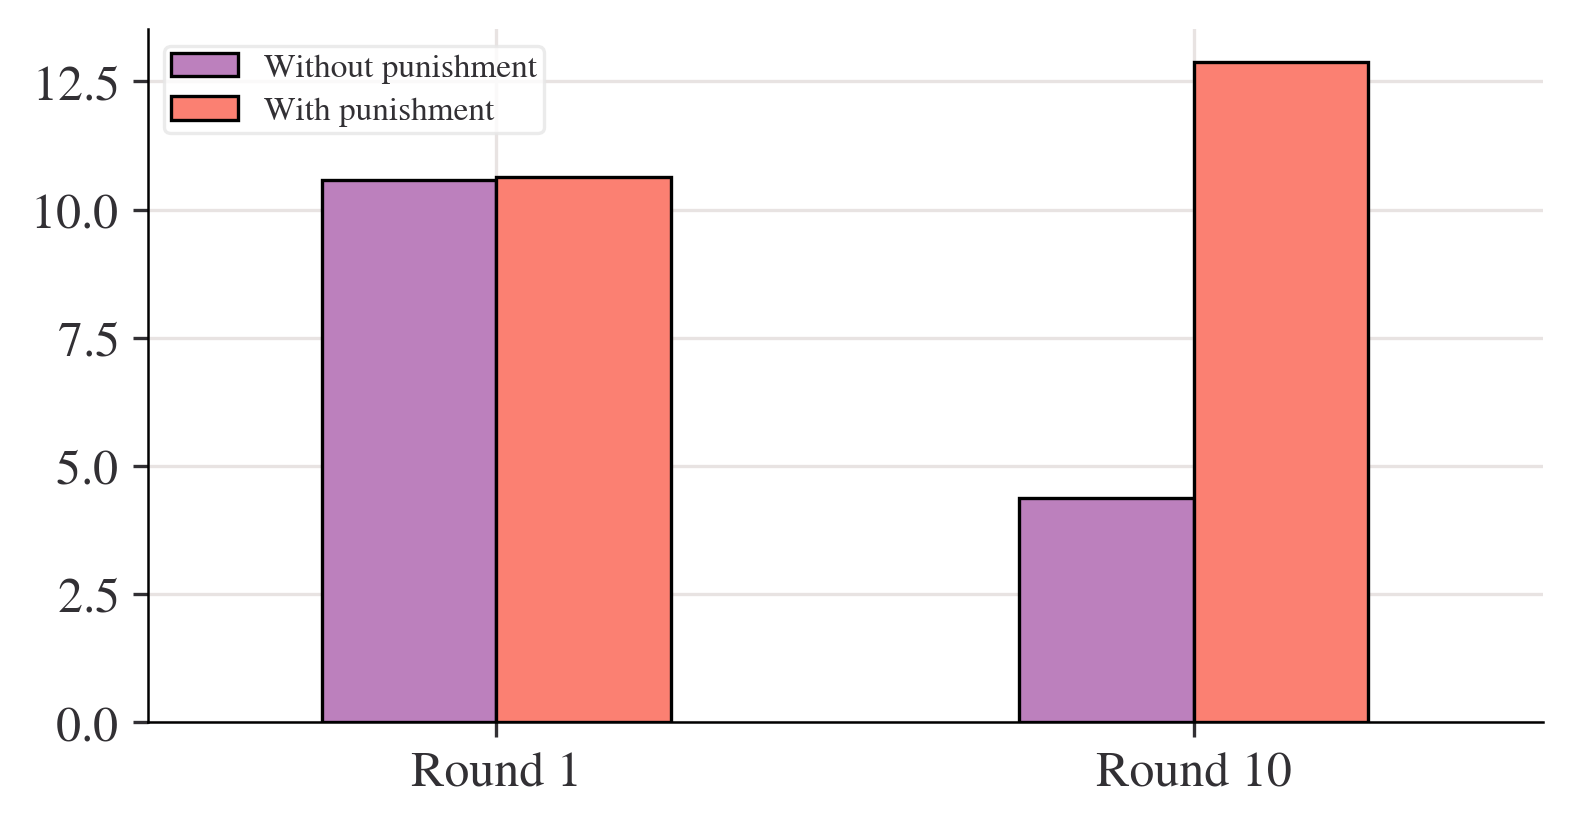

In [15]:
# Create new dataframe with bars in
compare_grps = pd.DataFrame(
    [mean_n_c.loc[[1, 10]], mean_p_c.loc[[1, 10]]],
    index=["Without punishment", "With punishment"],
)
# Rename columns to have 'round' in them
compare_grps.columns = ["Round " + str(i) for i in compare_grps.columns]
# Swap the column and index variables around with the transpose function, ready for plotting (.T is transpose)
compare_grps = compare_grps.T
# Make a bar chart
compare_grps.plot.bar(rot=0);

# Question 3

In [16]:
n_c = data_n.agg(["std", "var", "mean"], 1)
n_c

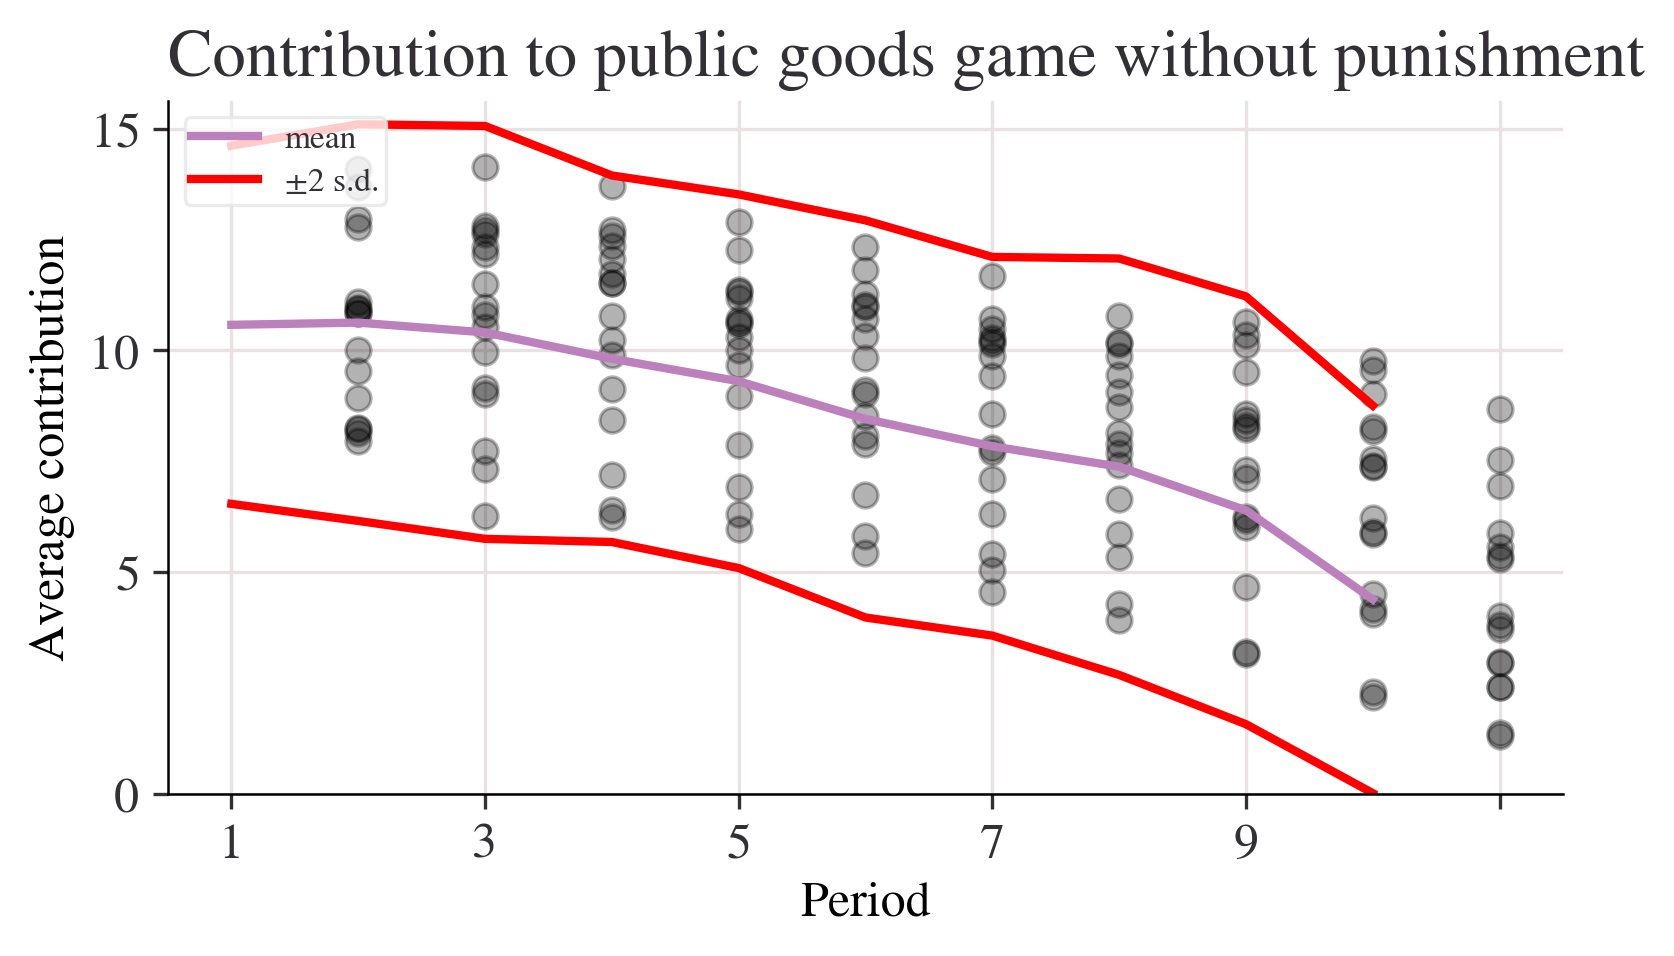

In [17]:
p_c = data_p.agg(["std", "var", "mean"], 1)
fig, ax = plt.subplots()
n_c["mean"].plot(ax=ax, label="mean")
# mean + 2 standard deviations
(n_c["mean"] + 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 standard deviations
(n_c["mean"] - 2 * n_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_n.columns)):
    ax.scatter(x=data_n.index, y=data_n.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game without punishment")
plt.show();

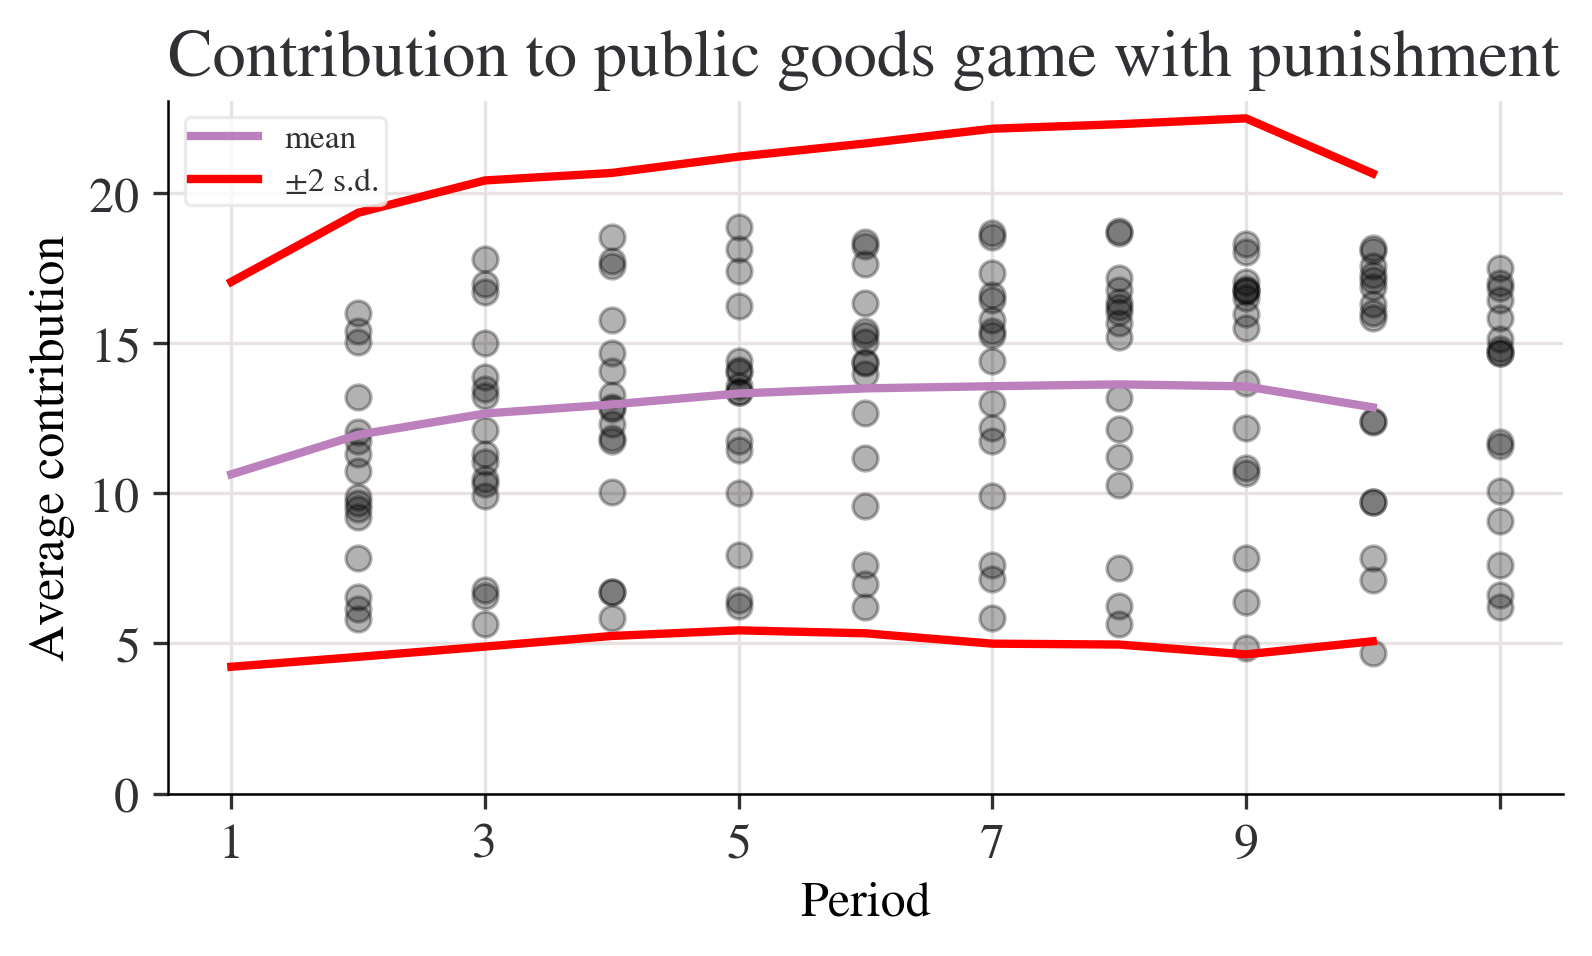

In [18]:
fig, ax = plt.subplots()
p_c["mean"].plot(ax=ax, label="mean")
# mean + 2 sd
(p_c["mean"] + 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="±2 s.d.")
# mean - 2 sd
(p_c["mean"] - 2 * p_c["std"]).plot(ax=ax, ylim=(0, None), color="red", label="")
for i in range(len(data_p.columns)):
    ax.scatter(x=data_p.index, y=data_p.iloc[:, i], color="k", alpha=0.3)
ax.legend()
ax.set_ylabel("Average contribution")
ax.set_title("Contribution to public goods game with punishment")
plt.show();

# Question 4

In [19]:
data_p.apply(lambda x: x.max() - x.min(), axis=1)

Period
1     10.199675
2     12.185065
3     12.689935
4     12.625000
5     12.140375
6     12.827541
7     13.098931
8     13.482621
9     13.496754
10    11.307360
dtype: float64

In [20]:
# A lambda function accepting three inputs, a, b, and c, and calculating the sum of the squares
test_function = lambda a, b, c: a**2 + b**2 + c**2


# Now we apply the function by handing over (in parenthesis) the following inputs: a=3, b=4 and c=5
test_function(3, 4, 5)

50

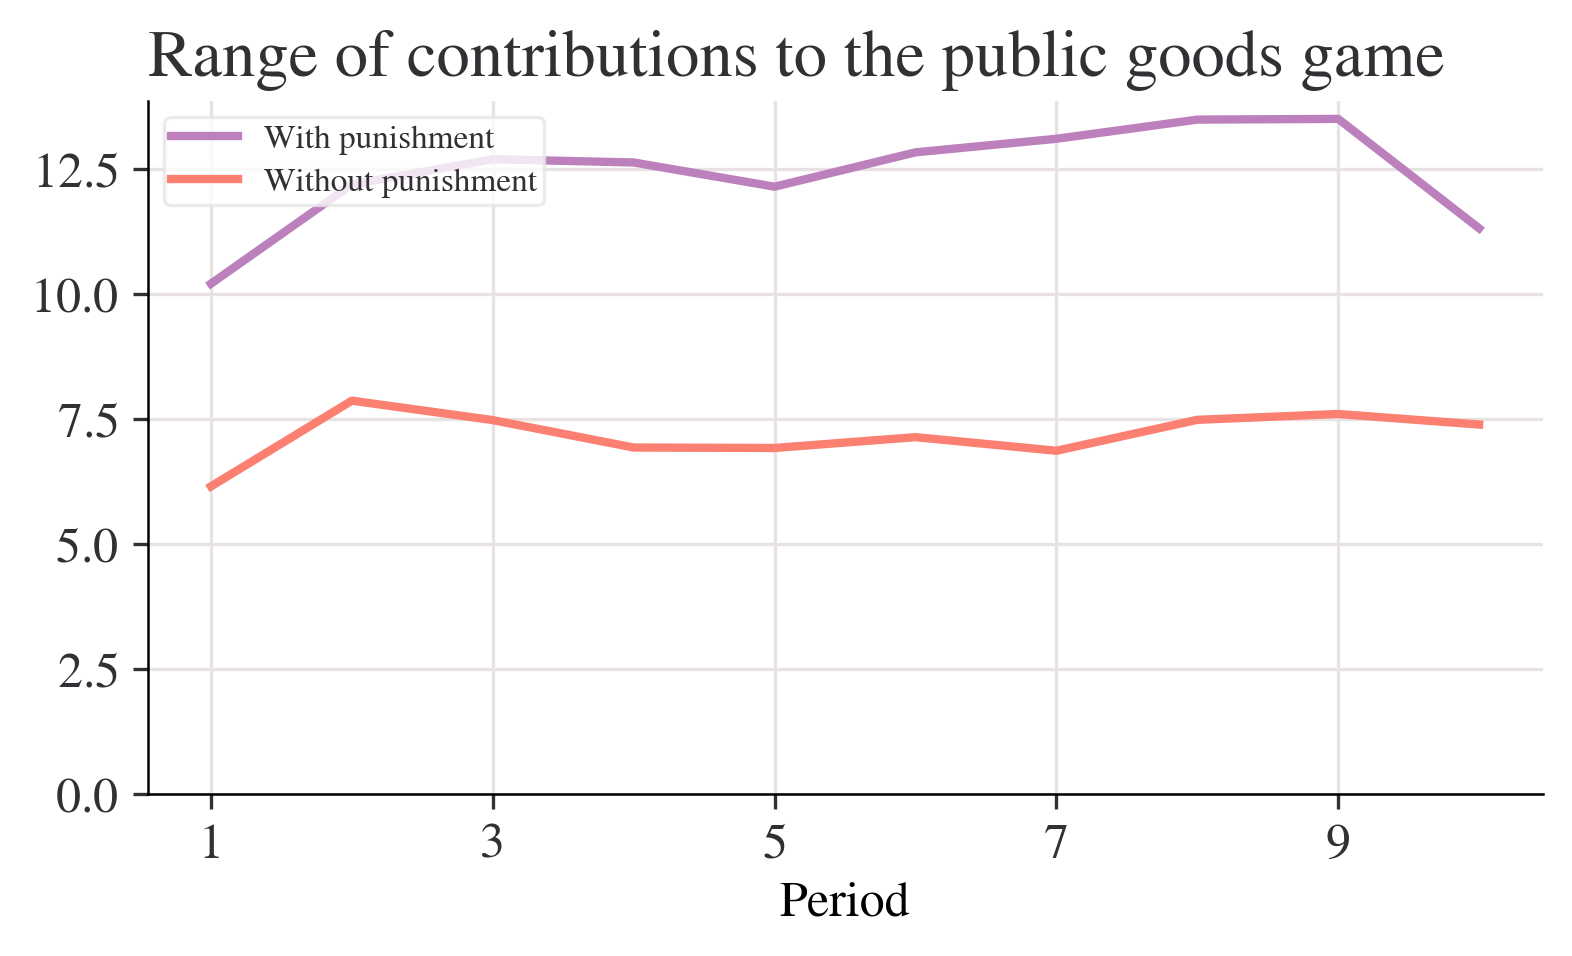

In [21]:
range_function = lambda x: x.max() - x.min()
range_p = data_p.apply(range_function, axis=1)
range_n = data_n.apply(range_function, axis=1)
fig, ax = plt.subplots()
range_p.plot(ax=ax, label="With punishment")
range_n.plot(ax=ax, label="Without punishment")
ax.set_ylim(0, None)
ax.legend()
ax.set_title("Range of contributions to the public goods game")
plt.show();



# Question 5(a)

In [22]:
funcs_to_apply = [range_function, "max", "min", "std", "mean"]
summ_p = data_p.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})
summ_n = data_n.apply(funcs_to_apply, axis=1).rename(columns={"<lambda>": "range"})

In [23]:
summ_n.loc[[1, 10], :].round(2)

In [24]:
summ_p.loc[[1, 10], :].round(2)

# Question 5(b)

Similarities: in both experiments with and without penalties, the range
of participants’ contributions changed over time, and in both
experiments the range of contributions covered a certain range of
values. Differences: in the experiment with punishment, the initial
contribution range (Period 1) was higher at 12.5. in the experiment
without punishment, the initial contribution range was lower at 10.0. in
the experiment with punishment, the contribution ranges stabilised at a
later stage, whereas in the experiment without punishment, the
contribution ranges showed more volatility.

# Part 2.3 How did changing the rules of the game affect behaviour?

# Question 1(a)

In [25]:

coinsdata = {
    "the first time": [2, 1, 2, 1,2, 2],
    "the second timep": [2, 2,1, 2, 1,1],

}


# Question 1(b)

all different

# Question 2(a)

In [31]:
# 2 (a)
# Use the ttest function to calculate the p-value for the difference in means in Period 1 (with and without punishment).

from scipy.stats import ttest_ind

no_punishment_period_1 = data_np.iloc[0, :].astype(float)
punishment_period_1 = data_np.iloc[14, :].astype(float)

no_punishment_avg_period_1 = no_punishment_period_1.mean()
punishment_avg_period_1 = punishment_period_1.mean()

print(f"Contributions without punishment: {no_punishment_avg_period_1}")
print(f"Contributions with punishment: {punishment_avg_period_1}")

Contributions without punishment: 10.57831343858623
Contributions with punishment: 10.638759195804596

In [32]:
t_stat, p_value = ttest_ind(no_punishment_period_1, punishment_period_1)

# p
print(f"The p-value of the mean difference in the first period: {p_value}")

The p-value of the mean difference in the first period: 0.9495666970741692

# Question 2(b)

No significant difference

# Question 3(a)

In [33]:
# Use the ttest function to calculate the p-value for the difference in means in Period 10 (with and without punishment).
no_punishment_period_10 = data_np.iloc[9, :].astype(float)
punishment_period_10 = data_np.iloc[23, :].astype(float)

no_punishment_avg_period_10 = no_punishment_period_10.mean()
punishment_avg_period_10 = punishment_period_10.mean()

# Calculate p-value using t-test
t_stat_10, p_value_10 = ttest_ind(no_punishment_period_10, punishment_period_10)
# p-value
print(f"The p-value of the mean difference in the first period: {p_value_10}")


The p-value of the mean difference in the first period: 1.809742363676441e-08

# Question 3(b)

The p-value data suggests a high degree of significance and that the
punishment mechanism has a significant effect on the behaviour of
individuals in the public goods game and that this effect is likely to
increase the level of cooperation \# Question 3(c) Figure 2.7 If the
sample size is very small or the overall variance is very large, then
even if the observed difference appears to be large. If the sample size
is very large or the overall variance is very small, then even if the
observed difference appears to be large, it may simply be a random
fluctuation rather than a real overall difference, #Figure 8. Then even
if the observed difference is small it may be highly statistically
significant. So a judgement cannot be made on the basis of the size of
the difference alone. A statistical significance test is performed to
assess whether the observed differences are beyond what can be explained
by random error.

# Question 4(a)

According to the above analysis, the penalty rules are clear, the
penalty is strong and immediately effective, and it can make people in
the public goods game change their practices. \# Question 4(b) To verify
the causal relationship between punishment options and game behaviour,
we need to compare the performance of the two groups with and without
punishment in phase 1. By observing how the punishment mechanism affects
participants’ contributory behaviour and quantifying the effect of this
influence, we can more accurately understand the role of punishment in
the game.

# Question 5

Laboratory experiments have limitations in measuring social preferences,
such as simplified environments, unrepresentative samples, overly
controlled conditions and measurement errors. Solutions include
enhancing experimental realism, expanding and diversifying samples,
simulating realistic conditions, introducing random factors, and
improving measurement precision to improve experimental accuracy and
reliability and better understand the relationship between social
preferences and real-life behaviours.